Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 84)                33684     
_________________________________________________________________
dense_6 (Dense)              (None, 10)               

UnknownError: 2 root error(s) found.
  (0) Unknown: Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[{{node conv2d_7/convolution}}]]
	 [[metrics_2/acc/Mean/_373]]
  (1) Unknown: Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[{{node conv2d_7/convolution}}]]
0 successful operations.
0 derived errors ignored.

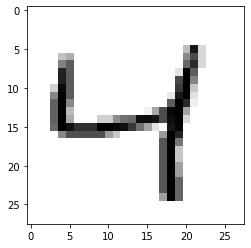

In [3]:
# codlabory 跑才行
from keras.datasets import mnist
from keras import models
from keras.layers import Conv2D  # Convolution Operation
from keras.layers import MaxPooling2D # Pooling
from keras.layers import Flatten
from keras.layers import Dense # Fully Connected Networks
from keras.utils import to_categorical
import matplotlib.pyplot as plt

#Mnist has 60,000 training samples, each with size 28 x 28
(X_train, train_labels), (X_test, test_labels) = mnist.load_data()

#convert from 28x28 to 28x28x1 as conv2D need 3-D data HxWxChannel
#255 is highest gray level. Black = 255, white = 0 in the dataset
#Conventionally 0 is black & 255 is white

train_images = X_train.reshape(X_train.shape[0],28,28,1)/255.0
test_images = X_test.reshape(X_test.shape[0],28,28,1)/255.0

# can have a look of one such picture
plt.imshow((255-X_train[2,:,:]), cmap='gray', vmin=0, vmax=255)

#convert to categorial labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
kernelSize=5
thsStrides=1
model = models.Sequential()
model.add(Conv2D(filters=6, kernel_size=kernelSize, input_shape=(28,28,1), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size = 2,strides=2))

model.add(Conv2D(filters=16, kernel_size=kernelSize, activation = 'relu'))
model.add(MaxPooling2D(pool_size=2,strides=2))


model.add(Flatten())
model.add(Dense(units=84, activation = 'relu'))
model.add(Dense(units=10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

model.fit(x=train_images,y=train_labels, epochs=10, batch_size=128)

test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print("test_loss:", test_loss, "    test_accuracy:", test_accuracy)

